Function 1 + 2 : create a white background and using mouse to draw a Rectangle

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import Label, Entry, Button
from matplotlib.patches import Polygon
import math

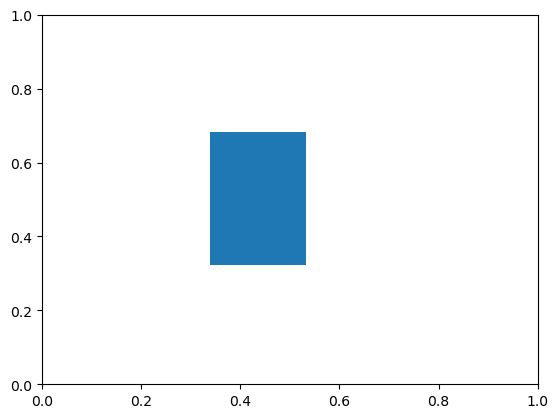

In [7]:
x1, y1 = 0, 0

def white_background():
    window = tk.Tk()

    fig, ax = plt.subplots()
    fig.patch.set_facecolor('white')

    canvas = FigureCanvasTkAgg(fig, master=window)
    canvas.draw()
    canvas.get_tk_widget().pack()

    rect = None
    
    def on_click(event):
        nonlocal rect
        if rect is not None:
            rect.remove()
    
        x1, y1 = event.xdata, event.ydata
        rect = ax.add_patch(plt.Rectangle((x1,y1), 0, 0))
        canvas.draw()

    def on_release(event):
        x2, y2 = event.xdata, event.ydata
        rect.set_width(x2 - rect.get_x())
        rect.set_height(y2 - rect.get_y())
        canvas.draw()

    canvas.mpl_connect('button_press_event', on_click)
    canvas.mpl_connect('button_release_event', on_release)

    window.mainloop()

white_background()



Function 3: Translate Rectangle input form keyboard with the given Rectangle

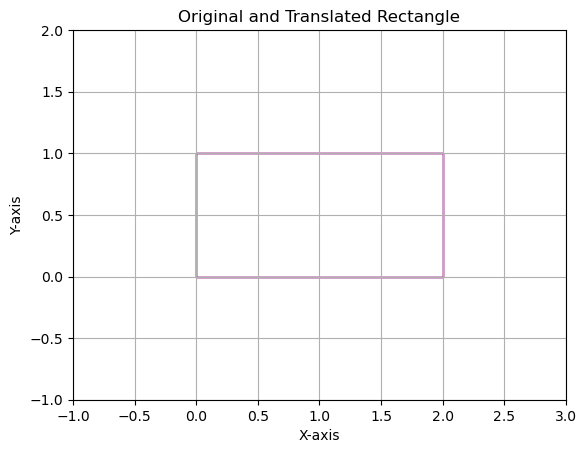

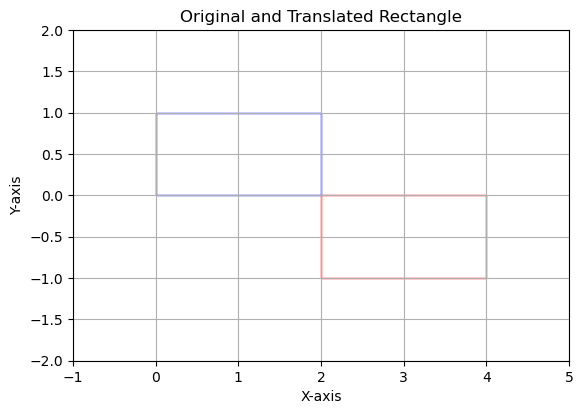

In [17]:
def translate_rectangle(rectangle, dx, dy):
    #Extract coordinates of original rectangle
    x1, y1, x2, y2, x3, y3, x4, y4 = rectangle
    #calculate new coordinates after translation
    x1_new = x1 + dx
    y1_new = y2 + dy

    x2_new = x2 + dx
    y2_new = y2 + dy

    x3_new = x3 + dx
    y3_new = y3 + dy

    x4_new = x4 + dx
    y4_new = y4 + dy

    return (x1_new, y1_new, x2_new, y2_new, x3_new, y3_new, x4_new, y4_new)

def update_plot(original_rectangle, translated_rectangle):
    #create a matplotlib figure and axis
    fig, ax = plt.subplots()
    
    original_polygon = Polygon(xy=list(zip(original_rectangle[::2], original_rectangle[1::2])), closed=True, edgecolor='blue', facecolor='none')
    translated_polygon = Polygon(xy=list(zip(translated_rectangle[::2], translated_rectangle[1::2])), closed=True, edgecolor='red', facecolor='none')

    ax.add_patch(original_polygon)
    ax.add_patch(translated_polygon)

    #set axis limits based on the rectangle coordinates
    ax.set_xlim(min(original_rectangle[::2] + translated_rectangle[::2]) - 1, max(original_rectangle[::2] + translated_rectangle[::2]) + 1)
    ax.set_ylim(min(original_rectangle[1::2] + translated_rectangle[1::2]) - 1, max(original_rectangle[1::2] + translated_rectangle[1::2]) + 1)
    #set equal ratio for x and y axes
    ax.set_aspect("equal", adjustable='box')
    #label and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Original and Translated Rectangle')

    #display grid in the frame
    plt.grid(True)
    #show Matplotlip
    plt.show()

def translate_button_click():
    #get value to translate for entry fields
    dx = float(dx_entry.get())
    dy = float(dy_entry.get())
    #translate the original rectangle
    translated_rectangle = translate_rectangle(original_rectangle, dx, dy)
    #updare the Mat plot with original rectangle and translate rectangle
    update_plot(original_rectangle, translated_rectangle)
#Create Tkinter window
root = tk.Tk()
root.title('Translation Transformation')

#Create labels, entry fields, and button in the Tkinter window
Label(root, text='Enter dx:').grid(row=0, column=0, padx=5, pady=5, sticky='e')
dx_entry = Entry(root)
dx_entry.grid(row=0, column=1, padx=5, pady=5)

Label(root, text='Enter dy:').grid(row=1, column=0, padx=5, pady=5, sticky='e')
dy_entry = Entry(root)
dy_entry.grid(row=1, column=1, padx=5, pady=5)

translate_button = Button(root, text='Translate', command=translate_button_click)
translate_button.grid(row=2, column=0, columnspan=2, pady=10)

#rectangle coordinates
original_rectangle = (0, 0, 2, 0, 2, 1, 0, 1)

#update plot with the initial rectangle
update_plot(original_rectangle, original_rectangle)

#Run the Tkinter event loop
root.mainloop()


Function 4: Rotation Tranformation

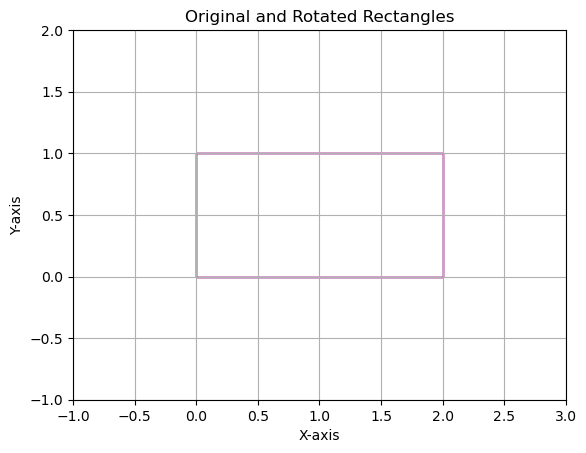

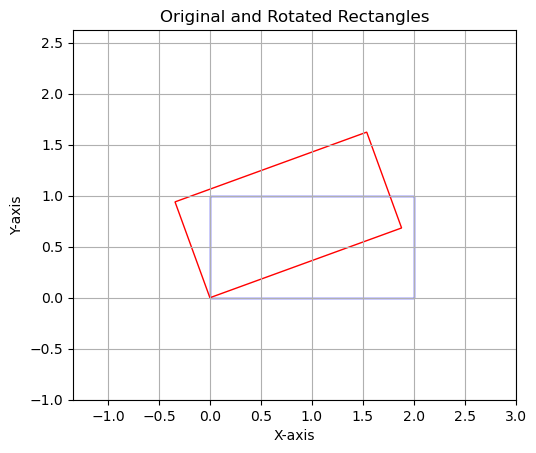

In [20]:
def rotate_rectangle(rectangle, angle_degrees, rotation_point=(0, 0)):
    angle_radians = math.radians(angle_degrees)
    cos_theta = math.cos(angle_radians)
    sin_theta = math.sin(angle_radians)

    rotation_x, rotation_y = rotation_point

    x_rotated = lambda x, y: cos_theta * (x - rotation_x) - sin_theta * (y - rotation_y) + rotation_x
    y_rotated = lambda x, y: sin_theta * (x - rotation_x) + cos_theta * (y - rotation_y) + rotation_y

    x1, y1, x2, y2, x3, y3, x4, y4 = rectangle

    x1_new, y1_new = x_rotated(x1, y1), y_rotated(x1, y1)
    x2_new, y2_new = x_rotated(x2, y2), y_rotated(x2, y2)
    x3_new, y3_new = x_rotated(x3, y3), y_rotated(x3, y3)
    x4_new, y4_new = x_rotated(x4, y4), y_rotated(x4, y4)

    return (x1_new, y1_new, x2_new, y2_new, x3_new, y3_new, x4_new, y4_new)

def update_plot(original_rectangle, rotated_rectangle):

    fig, ax = plt.subplots()

    original_polygon = Polygon(xy=list(zip(original_rectangle[::2], original_rectangle[1::2])), closed=True, edgecolor='blue', facecolor='none')
    rotated_polygon = Polygon(xy=list(zip(rotated_rectangle[::2], rotated_rectangle[1::2])), closed=True, edgecolor='red', facecolor='none')

    ax.add_patch(original_polygon)
    ax.add_patch(rotated_polygon)

    ax.set_xlim(min(original_rectangle[::2] + rotated_rectangle[::2]) - 1, max(original_rectangle[::2] + rotated_rectangle[::2]) + 1)
    ax.set_ylim(min(original_rectangle[1::2] + rotated_rectangle[1::2]) - 1, max(original_rectangle[1::2] + rotated_rectangle[1::2]) + 1)

    ax.set_aspect('equal', adjustable='box')

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Original and Rotated Rectangles')

    plt.grid(True)
    plt.show()

def rotate_button_click():

    angle_degrees = float(angle_entry.get())

    # Rotate original rectangle
    rotated_rectangle = rotate_rectangle(original_rectangle, angle_degrees)

    #update the Mat plot with the original and rotated rectangles
    update_plot(original_rectangle, rotated_rectangle)

root = tk.Tk()
root.title('Roration Tranformation')

Label(root, text='Enter rotation angle (degrees):').grid(row=0, column=0, padx=5, pady=5, sticky='e')
angle_entry = Entry(root)
angle_entry.grid(row=0, column=1, padx=5, pady=5)

rotate_button = Button(root, text='Rotate', command=rotate_button_click)
rotate_button.grid(row=1, column=0, columnspan=2, pady=10)

# Rectangle coordinates
original_rectangle = (0, 0, 2, 0, 2, 1, 0, 1)

# Update plot with the initial rectangle
update_plot(original_rectangle, original_rectangle)

# Run the Tkinter event loop
root.mainloop()

Function 5: Scale Tranformation

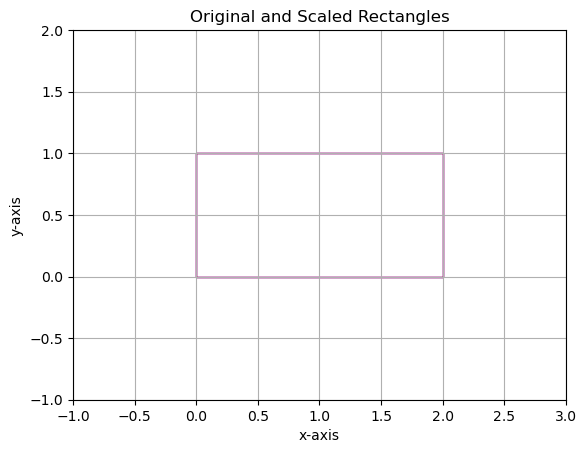

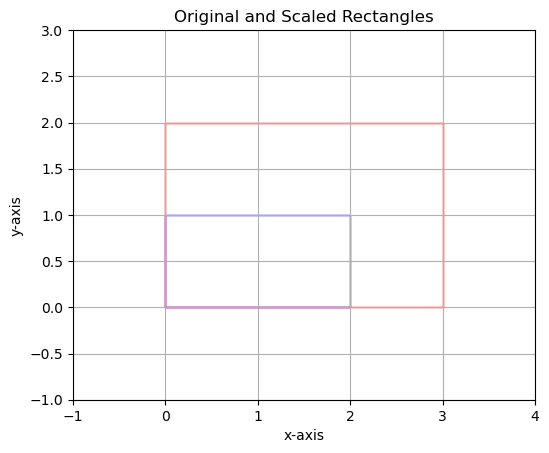

In [21]:
def scale_rectangle(rectangle, scale_factor_x, scale_factor_y):

    x1, y1, x2, y2, x3, y3, x4, y4 = rectangle

    x1_scaled, y1_scaled = x1 * scale_factor_x, y1 * scale_factor_y
    x2_scaled, y2_scaled = x2 * scale_factor_x, y2 * scale_factor_y
    x3_scaled, y3_scaled = x3 * scale_factor_x, y3 * scale_factor_y
    x4_scaled, y4_scaled = x4 * scale_factor_x, y4 * scale_factor_y

    return (x1_scaled, y1_scaled, x2_scaled, y2_scaled, x3_scaled, y3_scaled, x4_scaled, y4_scaled)

def update_plot(original_rectangle, scaled_rectangle):
    
    fig, ax = plt.subplots()

    original_polygon = Polygon(xy=list(zip(original_rectangle[::2], original_rectangle[1::2])), closed=True, edgecolor='blue', facecolor='none')
    scaled_polygon = Polygon(xy=list(zip(scaled_rectangle[::2], scaled_rectangle[1::2])), closed=True, edgecolor='red', facecolor='none')

    ax.add_patch(original_polygon)
    ax.add_patch(scaled_polygon)

    ax.set_xlim(min(original_rectangle[::2] + scaled_rectangle[::2]) - 1, max(original_rectangle[::2] + scaled_rectangle[::2]) + 1)
    ax.set_ylim(min(original_rectangle[1::2] + scaled_rectangle[1::2]) - 1, max(original_rectangle[1::2] + scaled_rectangle[1::2]) + 1)

    ax.set_aspect('equal', adjustable='box')

    # Add labels and title
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.title('Original and Scaled Rectangles')

    plt.grid(True)
    plt.show()

def scale_button_click():
    # Get scaling factors from the entry fields
    scale_factor_x = float(scale_x_entry.get())
    scale_factor_y = float(scale_y_entry.get())

    scaled_rectangle = scale_rectangle(original_rectangle, scale_factor_x, scale_factor_y)

    update_plot(original_rectangle, scaled_rectangle)

root = tk.Tk()
root.title('Scaling Transformation')

#create labels, entry fields, and button in the Tkinter window
Label(root, text='Enter scaling factor for x:').grid(row=0, column=0, padx=5, pady=5, sticky='e')
scale_x_entry = Entry(root)
scale_x_entry.grid(row=0, column=1, padx=5, pady=5)

Label(root, text='Enter scaling factor for y:').grid(row=1, column=0, padx=5, pady=5, sticky='e')
scale_y_entry = Entry(root)
scale_y_entry.grid(row=1, column=1, padx=5, pady=5)

scale_button = Button(root, text='Scale', command=scale_button_click)
scale_button.grid(row=2, column=0, columnspan=2, pady=10)

original_rectangle = (0, 0, 2, 0, 2, 1, 0, 1) #coordinate rectangle

#update plot with the initial rectangle
update_plot(original_rectangle, original_rectangle)

root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\baohu\anaconda3\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\baohu\AppData\Local\Temp\ipykernel_15220\379821167.py", line 60, in transform_button_click
    (float(src_x2_entry.get()), float(src_y2_entry.get())),
           ^^^^^^^^^^^^
NameError: name 'src_x2_entry' is not defined
